# MA934 - class 1

You should make at least one commit to your repository per computational task below - usually more.


## Task 1

Make sure that you can run the sample code in main.jl

Add a new function to the module Starter.jl that reads in parameters $\alpha$ and $n$ and produces a log plot of some samples of the function $$f(x) = x^\alpha \, \log(x)$$
at values of $x$ that increase in powers of 2 from 1 to $2^n$. This should only involve minor modifications of the existing code.

In [1]:
push!(LOAD_PATH,pwd())

4-element Array{String,1}:
 "@"                               
 "@v#.#"                           
 "@stdlib"                         
 "/home/asmith/class-1-adam96smith"

┌ Info: Recompiling stale cache file /home/asmith/.julia/compiled/v1.0/Starter1.ji for Starter1 [top-level]
└ @ Base loading.jl:1190


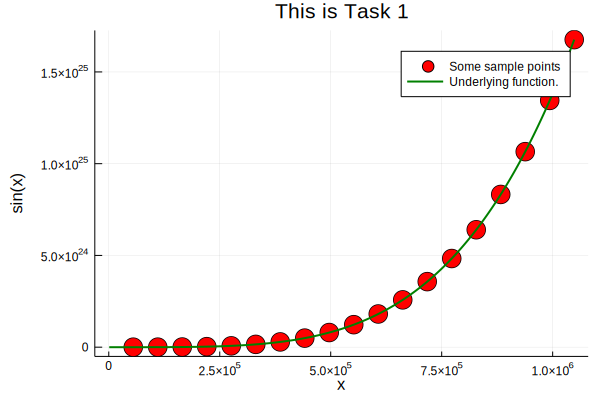

In [2]:
using Starter1
Task1_plot(20,4)

## Task 2

Write a new module containing functions that compute the $n^{th}$ term, $a_n$, in the Fibonacci sequence:
 * Iteratively
 * Recursively
 * Using memoization (hint: use Julia's Dict type for the lookup table)
 
The functions should work starting from any given values of $a_1$ and $a_2$.

Use the BenchmarkTools.jl package to measure the run-time of each of these functions over a range of values of $n$ and produce a plot to illustrate your results.

The recursive function implementation gets slow very quickly - I could only do up to $n=48$ on my laptop. Write a recursion relation for the computational complexity of the recursive version of the task. Solve it to prove that the computational complexity grows exponentially with $n$.

In [3]:
import Pkg; Pkg.add("BenchmarkTools")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [4]:
using Starter2
FibIt(16,1,1)

987

In [5]:
FibRec(16,1,1)

987

In [6]:
FibMem(16)

987

In [7]:
#a = rand(3,1)
#for i = 1:3
#    a[i] = @time FibMem(1)
#    return a
#end
#a = @time FibMem(i)

In [8]:
using Pkg; Pkg.add("Statistics")
using Statistics

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [9]:
Pkg.add("Plots")
Pkg.add("PyPlot")

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


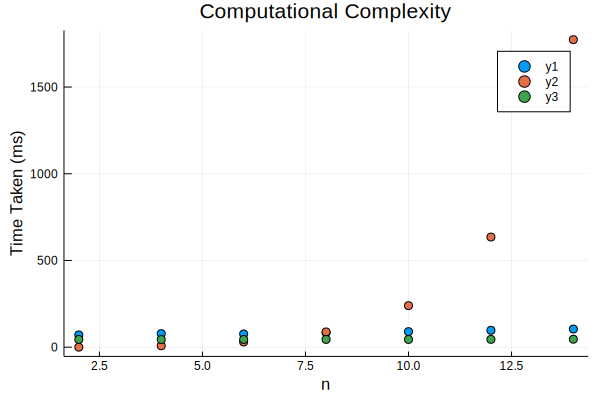

In [62]:
using BenchmarkTools
using PyPlot
n = 7
a = rand(n)
for i = 1:n
    a[i] = mean(@benchmark FibIt(2*$i,1,1)).time
end
using Plots
x = [2,4,6,8,10,12,14]
plot(x,a,title="Computational Complexity",ylabel=("Time Taken (ms)"),xlabel = ("n"),seriestype=:scatter)
b = rand(n)
for j = 1:n
    b[j] = mean(@benchmark FibRec(2*$j,1,1)).time
end
c = rand(n)
for l = 1:n
    c[l] = mean(@benchmark FibMem(2*$l)).time
end
plot!(x,b,seriestype=:scatter)
plot!(x,c,seriestype=:scatter)


1:4

## Task 3

The computational complexity of the naive divide-and-conquer algorithm for matrix multiplication satisfies the functional equation $$F(n) = 8 F(n/2) + 4 (n/2)^2$$ with $F(1)=1$.

The corresponding equation for Strassen multiplication is $$F(n) = 7 F(n/2) + 18 (n/2)^2$$ with $F(1)=1$.

Solve these recurrence relations explicitly to prove that the computational complexity of the two algorithms are $O(n^3)$ and $O(n^{\log_2(7)})$ respectively. 

It is helpful to adopt the change of variables $n=2^p$ with $a_p = F(2^p)$ to obtain linear (albeit inhomogeneous) recursion relations. 

Some helpful online notes about solving recursion relations can be found at:

https://www.tutorialspoint.com/discrete_mathematics/discrete_mathematics_recurrence_relation.htm